Data Load

In [3]:
import pandas as pd
from pathlib import Path

path = Path("..")

file_mean = next(path.rglob("LAEI_2019_NA_FILLED_WITH_MEAN.csv"))
dataframe = pd.read_csv(file_mean)

Visualizations

In [42]:
# List of pollutants to plot
pollutants = ['nox', 'n2o', 'pm10', 'pm2.5', 'co2']

grouped_by_year = (
    dataframe[["Year", *pollutants]]
    .groupby(by="Year")
    .sum()
    .reset_index()
)

grouped_by_sector = (
    dataframe[["Sector", *pollutants]]
    .groupby(by="Sector")
    .sum()
    .reset_index()
)


Pollutants by Year

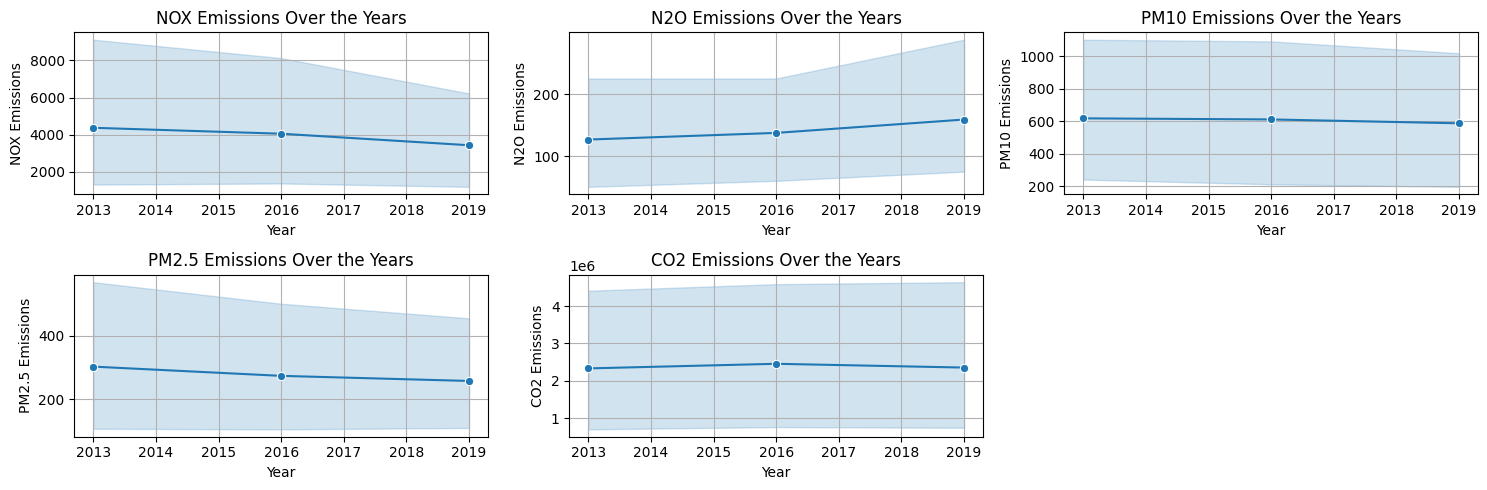

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
axes = axes.flatten() 

# Create individual plots for each pollutant
for i, pollutant in enumerate(pollutants):
    sns.lineplot(data=dataframe, x='Year', y=pollutant, marker='o', ax=axes[i])
    axes[i].set_title(f'{pollutant.upper()} Emissions Over the Years')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(f'{pollutant.upper()} Emissions')
    axes[i].grid()

# Remove any empty subplots (if any)
if len(pollutants) < len(axes):
    for j in range(len(pollutants), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [50]:
grouped_by_sector

,Sector,nox,n2o,pm10,pm2.5,co2
0,Accidental Fires,57.912533,169.758778,240.179088,222.877749,2.865256e+06
1,Agriculture,676.650764,621.293537,115.452134,50.003722,2.176856e+04
2,Aviation,12044.917653,169.758778,203.896405,169.830476,3.214089e+06
3,Biomass,4758.958871,169.758778,2375.998931,2375.998931,2.865256e+06
4,Commercial Cooking,4758.958871,169.758778,1643.644716,1643.644716,2.865256e+06
5,Construction,8663.174245,217.580432,6653.476358,755.016201,3.962554e+06
6,Forestry,0.000000,0.000000,0.000000,0.000000,0.000000e+00
7,Gas Leakage,0.000000,0.000000,0.000000,0.000000,2.229335e+03
8,Heat and Power Generation,35091.516902,413.410272,1757.756333,1666.217886,4.433310e+07
9,Industrial Processes,12624.897061,546.298040,727.154213,705.847233,9.245012e+06


Pollutants by Sector

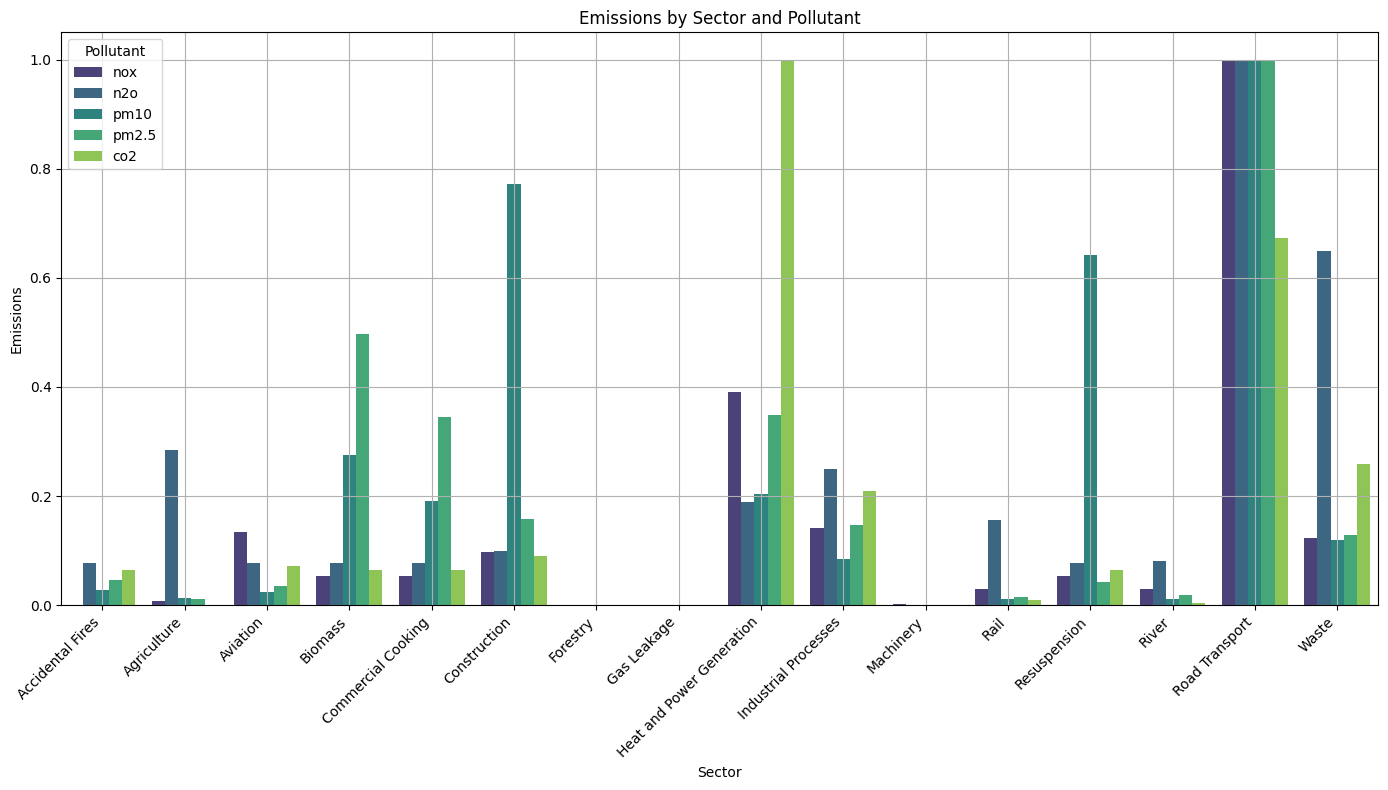

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(grouped_by_sector[['nox', 'n2o', 'pm10', 'pm2.5', 'co2']])
normalized_df = pd.DataFrame(normalized_values, columns=['nox', 'n2o', 'pm10', 'pm2.5', 'co2'])
normalized_df['Sector'] = grouped_by_sector['Sector'] 

# Melt the normalized DataFrame to long format for easier plotting
df_melted = normalized_df.melt(id_vars='Sector', 
                                 value_vars=['nox', 'n2o', 'pm10', 'pm2.5', 'co2'],
                                 var_name='Pollutant', 
                                 value_name='Normalized_Emissions')

# Create a bar plot for emissions by sector and pollutant
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Sector', y='Normalized_Emissions', hue='Pollutant', palette='viridis')

# Add titles and labels
plt.title('Emissions by Sector and Pollutant')
plt.xlabel('Sector')
plt.ylabel('Emissions')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.legend(title='Pollutant', loc=2)

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()

Correlation

In [66]:
pollutants_correlation = dataframe[pollutants].corr()

<Axes: >

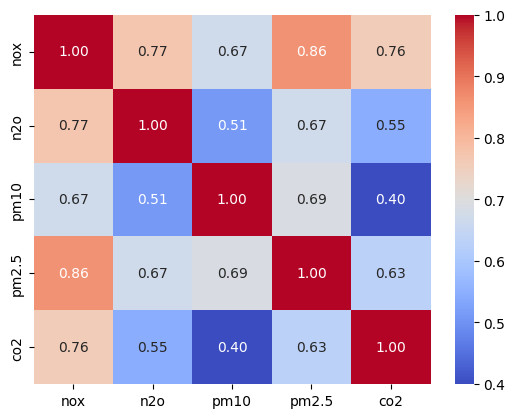

In [68]:
sns.heatmap(pollutants_correlation, annot=True, cmap='coolwarm', fmt=".2f")

In [69]:
pollutants_correlation

,nox,n2o,pm10,pm2.5,co2
nox,1.000000,0.771278,0.670577,0.860073,0.757645
n2o,0.771278,1.000000,0.510606,0.669754,0.546135
pm10,0.670577,0.510606,1.000000,0.690211,0.399391
pm2.5,0.860073,0.669754,0.690211,1.000000,0.629584
co2,0.757645,0.546135,0.399391,0.629584,1.000000
